# Auditory Demonstrations: The Decibel Scale 

Based on:   
**Demo 4** in [**Auditory Demonstrations**](https://research.tue.nl/en/publications/auditory-demonstrations), *A.J.M. Houtsma, Th.D. Rossing, W.M. Wagemakers*, Technische Universiteit Eindhoven, Institute for Perception Research, 1987.    
Booklet with [detailed documentation](https://pure.tue.nl/ws/portalfiles/portal/79033010/402660.pdf)


## First do all the imports


In [1]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML

import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import librosa as librosa
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
try:
  import soundfile as sf
except:
  ! pip -q install soundfile
  import soundfile as sf
    
import spectrogram_utils as spu
import audio_utils as audio

In the first part of this demonstration, we hear broadband noise reduced in steps of
6, 3, and 1 dB in order to obtain a feeling for the decibel scale

In [7]:
root = 'http://homes.esat.kuleuven.be/~compi/demos/'
fname = 'AuditoryDemonstrations/TrackNo08.wav'
resource = root+fname
#resource = 'train.wav'
# we load the CD data converted to 16kHz mono
wavdata, sample_rate = audio.load(resource,sample_rate=16000,mono=True)

In [11]:
# set pointers to instructions and demo data
n_shift = int(sample_rate/100)
instructions = wavdata[0:1200*n_shift]
demo = wavdata[1200*n_shift:]
#audio.play(instructions,samplerate,wait=True)
#audio.play(demo,samplerate)
#wavdata.ndim,wavdata.shape,demo.shape,samplerate

In [12]:
# Listen to the Instructions
Audio(data=instructions,rate=samplerate,autoplay=False)

In [13]:
# Play Demo
Audio(data=demo,rate=samplerate,autoplay=False)

Text(0, 0.5, 'Frequency Coefficient')

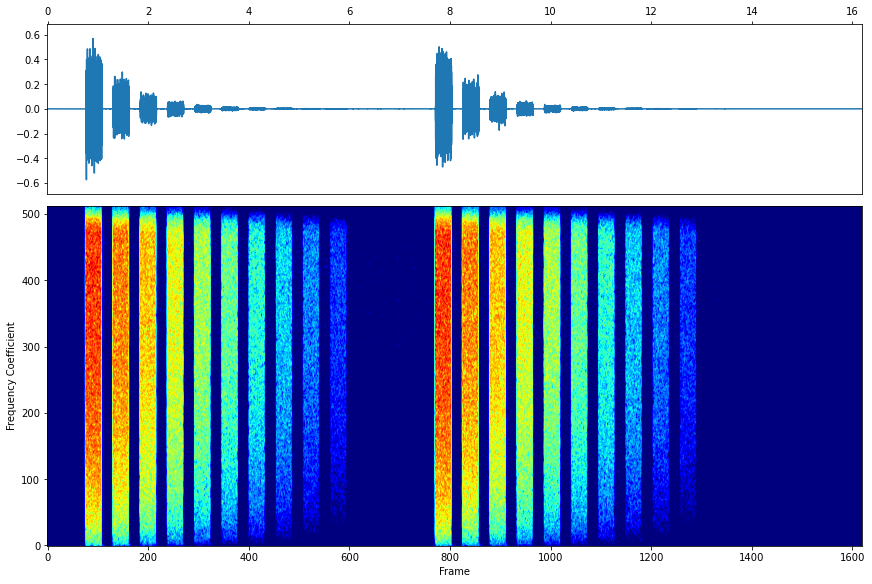

In [14]:
# Look at a Spectrogram of the Demo
spg = spu.spectrogram(demo,samplerate=sample_rate,n_fft=1024)
fig= spu.plot_spg(spg=[spg], wav=demo, samplerate=sample_rate, n_shift=n_shift)
ax = fig.get_axes()
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Frequency Coefficient')

(-60.0, 0.0)

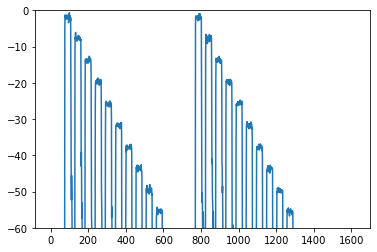

In [15]:
# intensity function in dB
# we measure intensity as  10. * log10(SUM(x^2)/N) + 14
# - the +15 offset is arbitrary
# - the EPS of 1.e-10 yields a range of around 60dB
# 
EPS = 1.e-10
OFFSET = 15.0
def intensity(y,n_shift):
    nfr = int(len(y)/n_shift)
    energy = np.zeros((nfr,))
    for ifr in range(0,nfr):
        energy[ifr] = np.sum(np.square(y[ifr*n_shift:(ifr*n_shift+n_shift)]))/float(n_shift)
    return(10*np.log10(energy+EPS) + OFFSET)

en = intensity(demo,n_shift)
plt.plot(en)
plt.ylim([-60,0])
        

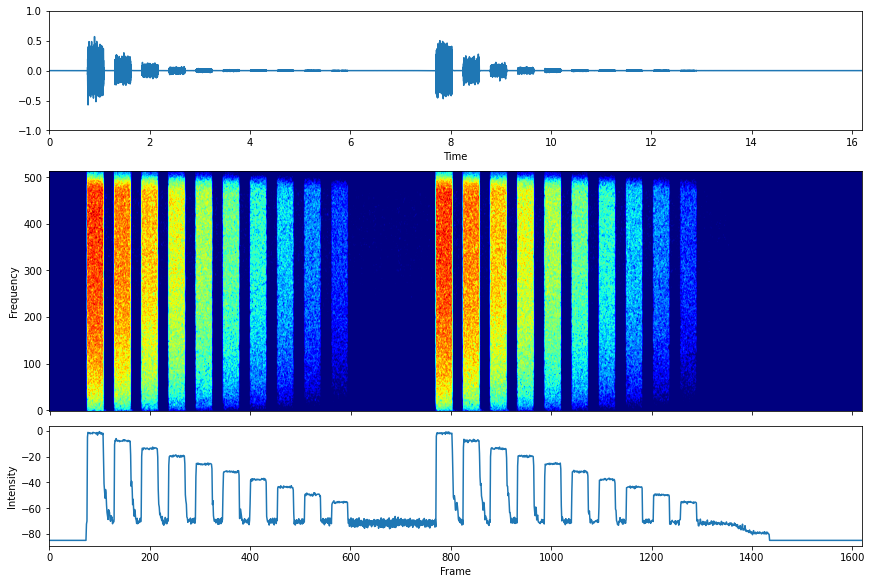

In [18]:
fig1,ax1 = spu.make_row_grid(figsize=(12,8),height_ratios=[1.,2.,1.])
spu.add_line_plot(ax1[0],demo,dx=1./sample_rate,ylim=[-1.,1.],xlabel='Time(secs)')
spu.add_img_plot(ax1[1],spg,xticks=False,ylabel='Frequency')
spu.add_line_plot(ax1[2],en,ylabel='Intensity',xlabel='Frame')